In [2]:
import pandas as pd
from sklearn import ensemble
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

ImportError: DLL load failed: Не найден указанный модуль.

In [3]:
RANDOM_STATE = 11

In [35]:
df = pd.read_csv('out.csv')
print (df.shape)

(28729, 40)


In [36]:
protocols = pd.get_dummies(df['protocol'])
df = df.drop(['Unnamed: 0', 'protocol'], axis=1)
df = pd.concat((protocols, df), axis=1)
print(df.head())

   tcp  udp  src_port  dst_port  packet_number  transfer_bytes    duration  \
0    0    1     36597       161           1050          196562    1.873650   
1    0    1     56213     19295           4768          952040   95.315816   
2    1    0     41113       443             46           45300  105.624150   
3    1    0       443     44690             12            5430  105.523715   
4    1    0     40848       389              8             498    0.000743   

   average_packet_throughput  byte_throughput    start_time  ...  \
0                 560.403491    104908.600859  1.419005e+09  ...   
1                  50.023178      9988.268893  1.308851e+09  ...   
2                   0.435506       428.879191  1.308851e+09  ...   
3                   0.113719        51.457627  1.308851e+09  ...   
4               10767.160162    670255.720054  1.132019e+09  ...   

   packet_2_len  packet_3_len  packet_4_len  packet_5_len  packet_6_len  \
0           175           178           178    

In [37]:
numerical_columns = list(df.columns)
numerical_columns.remove('tcp')
numerical_columns.remove('udp')
numerical_columns.remove('app')


In [38]:
data_numerical = df[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data_numerical.describe()


,src_port,dst_port,packet_number,transfer_bytes,duration,average_packet_throughput,byte_throughput,start_time,end_time,UDP_non_payload,...,packet_1_len,packet_2_len,packet_3_len,packet_4_len,packet_5_len,packet_6_len,packet_7_len,packet_8_len,packet_9_len,packet_10_len
count,2.872900e+04,2.872900e+04,2.872900e+04,2.872900e+04,2.872900e+04,2.872900e+04,2.872900e+04,2.872900e+04,2.872900e+04,2.872900e+04,...,2.872900e+04,2.872900e+04,2.872900e+04,2.872900e+04,2.872900e+04,2.872900e+04,2.872900e+04,2.872900e+04,2.872900e+04,2.872900e+04
mean,-9.497317e-17,7.914431e-18,5.441171e-18,-3.957215e-18,-5.263096e-16,-2.453473e-15,-5.793363e-15,4.590370e-14,8.622772e-14,-4.946519e-18,...,-2.819516e-17,-8.409082e-18,7.914431e-18,-4.946519e-17,-6.331544e-17,9.497317e-17,4.748658e-17,-7.914431e-18,4.748658e-17,-2.770051e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.075284e+00,-4.848669e-01,-6.923191e-02,-3.591964e-02,-2.773586e-01,-5.747194e-01,-6.830088e-01,-5.405582e+00,-5.405582e+00,-1.957094e-02,...,-3.532848e-01,-3.197911e-01,-5.498610e-01,-4.428035e-01,-8.136793e-01,-8.076191e-01,-3.577973e-01,-3.496719e-01,-3.289231e-01,-3.176263e-01
25%,-1.341270e-01,-4.770644e-01,-6.011684e-02,-3.161119e-02,-2.772903e-01,-5.741916e-01,-6.823413e-01,-8.334837e-02,-8.334849e-02,-1.957094e-02,...,-1.356546e-01,-2.024904e-01,-5.171728e-01,-2.428181e-01,-6.373141e-01,-6.196395e-01,-3.577973e-01,-3.496719e-01,-3.289231e-01,-3.176263e-01
50%,2.538007e-01,-4.290592e-01,-4.796341e-02,-3.078990e-02,-2.764263e-01,-5.260732e-01,-5.920562e-01,-8.334715e-02,-8.334718e-02,-1.957094e-02,...,-1.356546e-01,-8.518960e-02,-5.171728e-01,-2.428181e-01,2.930127e-01,3.531550e-01,-1.772895e-01,-1.411758e-01,-1.214697e-01,-8.642680e-02
75%,6.320695e-01,2.317717e-01,-4.188669e-02,-2.985416e-02,-1.914988e-01,5.748374e-01,6.767595e-01,-8.334571e-02,-8.334584e-02,-1.957094e-02,...,-6.311123e-02,-8.518960e-02,9.572972e-02,-1.828225e-01,2.930127e-01,3.719530e-01,-1.772895e-01,-1.411758e-01,-1.214697e-01,-8.642680e-02
max,1.069391e+00,8.178539e+00,9.377651e+01,1.155306e+02,8.169488e+01,6.586573e+01,3.782396e+01,2.282972e+00,2.282972e+00,5.109439e+01,...,1.777350e+01,2.211398e+01,5.459308e+00,9.531469e+00,8.930502e+00,9.427871e+00,1.059902e+01,1.066414e+01,1.155297e+01,1.227119e+01


In [39]:
X = pd.concat((df[['tcp', 'udp', 'app']], data_numerical), axis=1)
# Считаем по каждому столбцу количество заполненных значений
count = X.count(axis=0)
# В null_columns сохраняем столбцы, значения в которых не заполнены
null_columns = [index for index in count.index if not count[index]]
if null_columns:
    # дропаем незаполненные столбцы
    X = X.drop(null_columns, axis=1)
else:
    # заполняем не до конца заполненные столбцы
    X = X.fillna(X.median(axis=0), axis=0)
y = X['app']
X = X.drop(['app'], axis=1)
print(X.shape)
print(y.shape)



(28729, 34)
(28729,)


In [41]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

feature_names = X.columns
print("Feature importances RandomForest:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))


Feature importances RandomForest:
 1. feature 'dst_port' (0.3303)
 2. feature 'packet_3_len' (0.0577)
 3. feature 'byte_throughput' (0.0514)
 4. feature 'average_packet_throughput' (0.0412)
 5. feature 'duration' (0.0397)
 6. feature 'avg_inter_arrival_time' (0.0367)
 7. feature 'max_inter_arrival_time' (0.0349)
 8. feature 'min_inter_arrival_time' (0.0337)
 9. feature 'std_packet_size' (0.0324)
10. feature 'std_inter_arrival_time' (0.0313)
11. feature 'start_time' (0.0284)
12. feature 'end_time' (0.0252)
13. feature 'max_packet_size' (0.0239)
14. feature 'transfer_bytes' (0.0205)
15. feature 'avg_packet_size' (0.0189)
16. feature 'packet_5_len' (0.0184)
17. feature 'n_SYN' (0.0154)
18. feature 'src_port' (0.0152)
19. feature 'packet_1_len' (0.0152)
20. feature 'packet_7_len' (0.0144)
21. feature 'packet_8_len' (0.0139)
22. feature 'packet_6_len' (0.0129)
23. feature 'packet_2_len' (0.0129)
24. feature 'packet_number' (0.0104)
25. feature 'tcp  ' (0.0097)
26. feature 'udp  ' (0.0096)
2

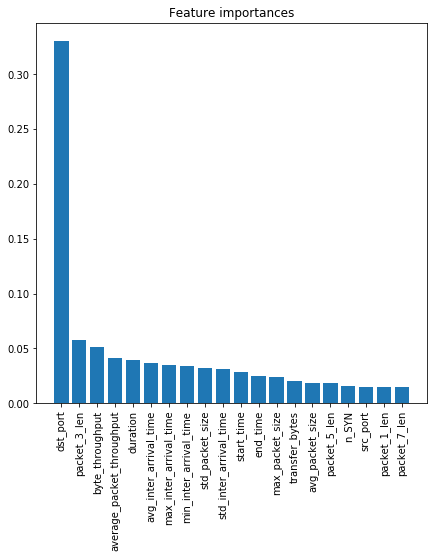

In [42]:
# first 20 important features
# d_first = 20
# plt.figure(figsize=(7, 7))
# plt.title("Feature importances")
# plt.bar(range(d_first), importances[indices[:d_first]], align='center')
# plt.show(plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90))
# plt.xlim([-1, d_first])

In [1]:
def searcMostImportancesFeatures(num_features):
    return [feature_names[idx] for idx in indices[:num_features]]

In [4]:
def fit_classifier(data, classifier):
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=RANDOM_STATE)
    
    if isinstance(classifier, KNeighborsClassifier):
        n_neighbors_array = [1, 5, 10, 24, 27, 30]
        grid = GridSearchCV(classifier, param_grid={'n_neighbors': n_neighbors_array})
        grid.fit(X_train, y_train)
        best_cv_err = 1 - grid.best_score_
        best_n_neighbors = grid.best_estimator_.n_neighbors
        classifier = KNeighborsClassifier(n_neighbors=best_n_neighbors)
    
    classifier.fit(X_train, y_train)
    
    err_train = np.mean(y_train != rf.predict(X_train))
    err_test = np.mean(y_test != rf.predict(X_test))
    
    return err_train, err_test

In [ ]:
# MLRandomForest, KNN, GBT
ml_rf_clf = ensemble.RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
ml_rf_errors = []
knn_clf = KNeighborsClassifier()
knn_errors = []
gbt_clf = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=RANDOM_STATE)
gbt_errors = []
for i in range(2, 10):
    print("Start process for {} features".format(i))
    features = searcMostImportancesFeatures(i)
    df = pd.DataFrame(X[features])
    print("Fit MLRandomForest with {} features".format(i))
    ml_rf_errors.append(fit_classifier(df, ml_rf_clf)[1])
    print("Fit KNN with {} features".format(i))
    knn_errors.append(fit_classifier(df, knn_clf)[1])
    print("Fit GBT with {} features".format(i))
    gbt_errors.append(fit_classifier(df, gbt_clf)[1])
    
errors_df = pd.DataFrame({"ml_rf_errors": ml_rf_errors,
                          "knn_errors": knn_errors,
                          "gbt_errors": gbt_errors})